In [12]:
from aocd import get_data
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import itertools
import numpy as np

def str2intList(s):  # str2intList("2\n3") -> [2,3]
    return [int(x) for x in s.strip().split("\n")]

8

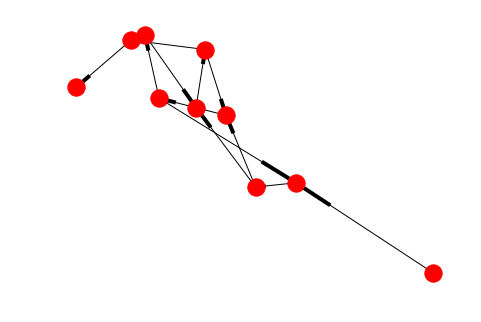

In [4]:
def solve(data):
    g = nx.DiGraph()
    BIG = 10000
    for nr, line in enumerate(data.split("\n")):
        ins, val = line.split(" ")
        val = int(val)
        g.add_node(nr, label=line)
        if ins == "nop":
            g.add_edge(nr, nr+val, label=BIG) # add big connection first, in case the normal version overrides it
            g.add_edge(nr, nr+1, label=0)
        elif ins == "jmp":
            g.add_edge(nr, nr+1, label=BIG)
            g.add_edge(nr, nr+val, label=0)
        elif ins == "acc":
            g.add_edge(nr, nr+1, label=val)
    # plt.figure(figsize=(12, 6))
    nx.draw_spring(g, nodesize=15)
    return nx.shortest_path_length(g, 0, nr+1, weight="label") - BIG

solve("""nop +0
acc +1
jmp +4
acc +3
jmp -3
acc -99
acc +1
jmp -4
acc +6""")

1260

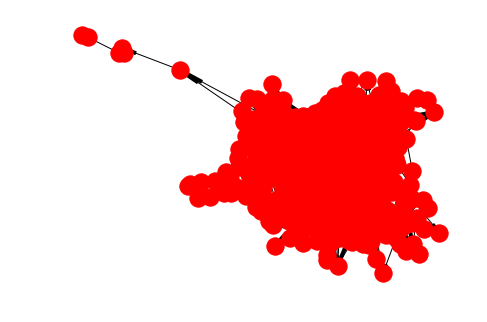

In [5]:
solve(get_data(day=8))

In [13]:
# day 9 b, using solve from day 9 a
def solve(data, method=0):
    d = str2intList(data)
    preamble_len = 5 if len(d) == 20 else 25 # if test-set, we have shorter preamble
    for i in range(preamble_len, len(d)):
        if d[i] not in {sum(tup) for tup in itertools.permutations(d[i-preamble_len:i], 2)}:
            return d[i] # method 0 returns here

def solve_(data, method=1):
    d = str2intList(data)
    number_to_find = solve(data)
    m = np.array([list(np.cumsum(d[i:0:-1])) + [0]*(len(d)-i) for i in range(len(d))])
    pos, back = [x[0] for x in np.where(m == number_to_find)]
    sa = d[pos-back:pos]
    return min(sa)+max(sa)
    
print(solve_(get_data(day=9)))

3535124
